<a href="https://colab.research.google.com/github/Pingying-Chen/R-Samples/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regressopm with R

### Dataset
Basic Computer Data (https://www.kaggle.com/datasets/kingburrito666/basic-computer-data-set)
### Data Description
This is a simple dataset for basic data analysis.  
The Computers data set has 6259 observations with 10 variables. The variables are price (numeric), speed (numeric), hd (numeric), ram (numeric), screen (numeric), cd (categorical), multi (categorical), premium (categorical), ads (numeric), trend (numeric).  
### Problem Description
This notebook is a practice of using R to do different regressions to predict the price of the computer and find out what the best regression model is for this dataset.

## 1. Preparation

In [ ]:
# Install and/or load packages

# Specify packages
my_packages <- c("corrplot", "rpart", "rpart.plot", "caret")

# Extract not already installed packages from my_packages
# Install not already installed packages
# Load multiple packages
not_installed <- my_packages[!(my_packages %in% installed.packages()[ , "Package"])]
if(length(not_installed)) install.packages(not_installed)
lapply(my_packages, require, character.only = TRUE)

Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: rpart

Loading required package: rpart.plot

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

In [ ]:
# Read csv file
computers <- read.csv("data/computers.csv")

# Read first six rows
head(computers)

,X,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,1,1499,25,80,4,14,no,no,yes,94,1
2,2,1795,33,85,2,14,no,no,yes,94,1
3,3,1595,25,170,4,15,no,no,yes,94,1
4,4,1849,25,170,8,14,no,no,no,94,1
5,5,3295,33,340,16,14,no,no,yes,94,1
6,6,3695,66,340,16,14,no,no,yes,94,1


In [ ]:
# Remove first column
computers <- computers[, -1]

# Summary
summary(computers)

     price          speed              hd              ram        
 Min.   : 949   Min.   : 25.00   Min.   :  80.0   Min.   : 2.000  
 1st Qu.:1794   1st Qu.: 33.00   1st Qu.: 214.0   1st Qu.: 4.000  
 Median :2144   Median : 50.00   Median : 340.0   Median : 8.000  
 Mean   :2220   Mean   : 52.01   Mean   : 416.6   Mean   : 8.287  
 3rd Qu.:2595   3rd Qu.: 66.00   3rd Qu.: 528.0   3rd Qu.: 8.000  
 Max.   :5399   Max.   :100.00   Max.   :2100.0   Max.   :32.000  
     screen           cd               multi             premium         
 Min.   :14.00   Length:6259        Length:6259        Length:6259       
 1st Qu.:14.00   Class :character   Class :character   Class :character  
 Median :14.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :14.61                                                           
 3rd Qu.:15.00                                                           
 Max.   :17.00                                                           
      ads    

In [ ]:
# Turn characters to factors
computers[sapply(computers, is.character)] <- lapply(computers[sapply(computers, is.character)], as.factor)
str(computers)

'data.frame':	6259 obs. of  10 variables:
 $ price  : int  1499 1795 1595 1849 3295 3695 1720 1995 2225 2575 ...
 $ speed  : int  25 33 25 25 33 66 25 50 50 50 ...
 $ hd     : int  80 85 170 170 340 340 170 85 210 210 ...
 $ ram    : int  4 2 4 8 16 16 4 2 8 4 ...
 $ screen : int  14 14 15 14 14 14 14 14 14 15 ...
 $ cd     : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 2 1 1 1 ...
 $ multi  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ premium: Factor w/ 2 levels "no","yes": 2 2 2 1 2 2 2 2 2 2 ...
 $ ads    : int  94 94 94 94 94 94 94 94 94 94 ...
 $ trend  : int  1 1 1 1 1 1 1 1 1 1 ...


## 2. Exploratory Analysis

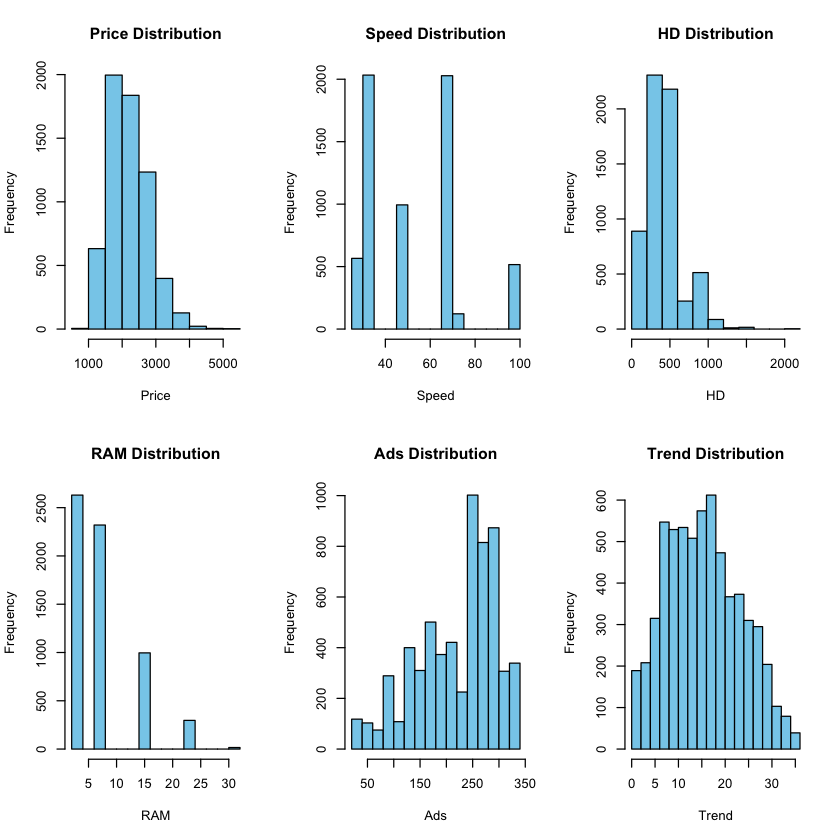

In [ ]:
# Continuous values distribution
par(mfrow=c(2,3))
hist(computers$price, main="Price Distribution", xlab="Price", col="skyblue")
hist(computers$speed, main="Speed Distribution", xlab="Speed", col="skyblue")
hist(computers$hd, main="HD Distribution", xlab="HD", col="skyblue")
hist(computers$ram, main="RAM Distribution", xlab="RAM", col="skyblue")
hist(computers$ads, main="Ads Distribution", xlab="Ads", col="skyblue")
hist(computers$trend, main="Trend Distribution", xlab="Trend", col="skyblue")

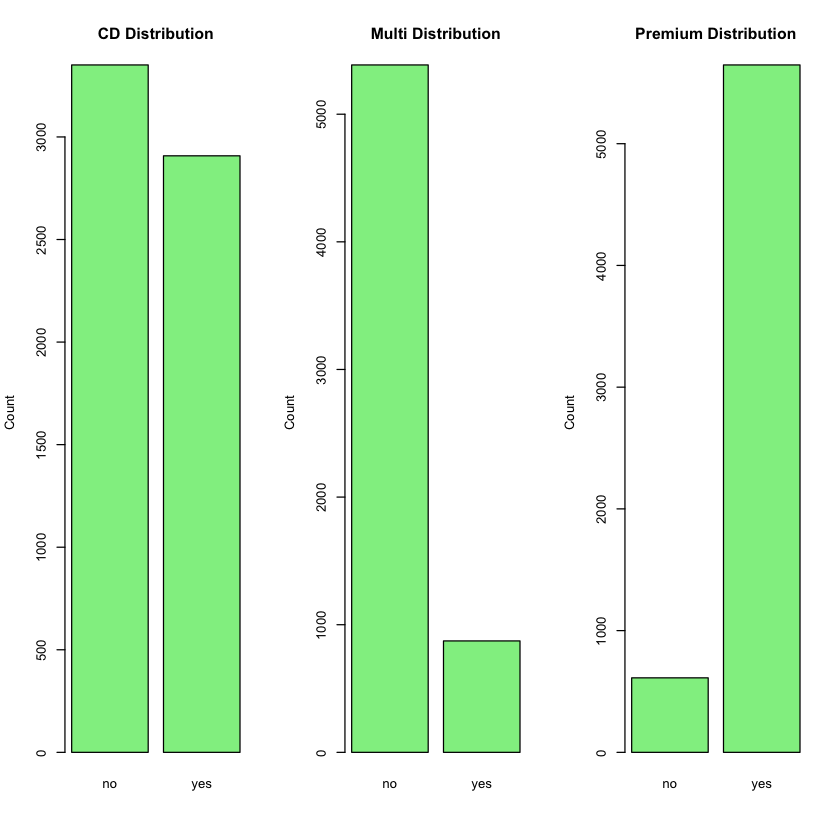

In [ ]:
# Categorical values
par(mfrow=c(1,3))
barplot(table(computers$cd), main="CD Distribution", ylab="Count", col="lightgreen")
barplot(table(computers$multi), main="Multi Distribution", ylab="Count", col="lightgreen")
barplot(table(computers$premium), main="Premium Distribution", ylab="Count", col="lightgreen")

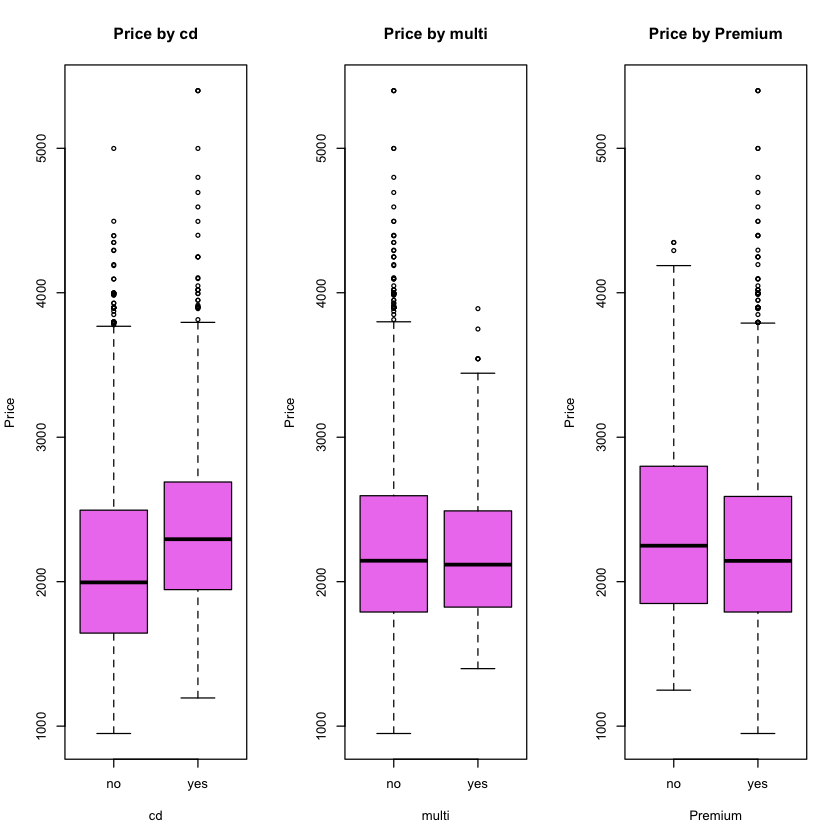

In [ ]:
# Continuous vs categorical
par(mfrow=c(1,3))
boxplot(price ~ cd, data=computers, main="Price by cd", xlab="cd", ylab="Price", col="violet")
boxplot(price ~ multi, data=computers, main="Price by multi", xlab="multi", ylab="Price", col="violet")
boxplot(price ~ premium, data=computers, main="Price by Premium", xlab="Premium", ylab="Price", col="violet")

In [ ]:
# Correlation plot
par(mfrow=c(1,1))
(cor_matrix <- cor(computers[, c("price", "speed", "hd", "ram", "screen", "ads", "trend")]))

,price,speed,hd,ram,screen,ads,trend
price,1.00000000,0.3009765,0.4302578,0.6227482,0.29604147,0.05454047,-0.1999869
speed,0.30097646,1.0000000,0.3723041,0.2347605,0.18907412,-0.21523206,0.4054383
hd,0.43025779,0.3723041,1.0000000,0.7777263,0.23280153,-0.32322200,0.5777901
ram,0.62274824,0.2347605,0.7777263,1.0000000,0.20895374,-0.18166971,0.2768438
screen,0.29604147,0.1890741,0.2328015,0.2089537,1.00000000,-0.09391943,0.1886144
ads,0.05454047,-0.2152321,-0.3232220,-0.1816697,-0.09391943,1.00000000,-0.3185525
trend,-0.19998694,0.4054383,0.5777901,0.2768438,0.18861444,-0.31855251,1.0000000


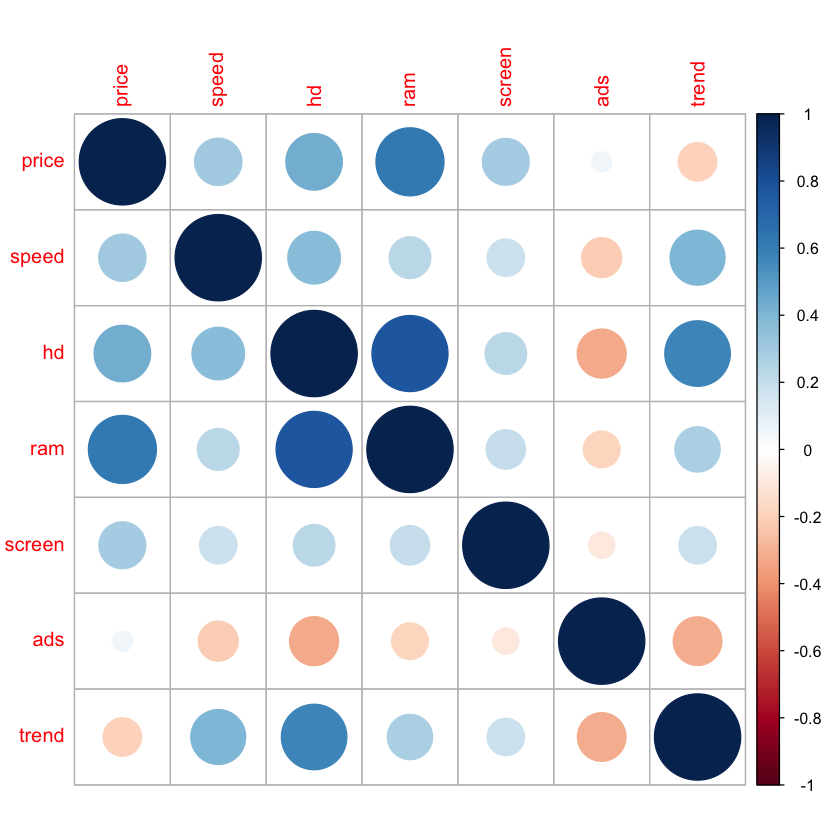

In [ ]:
corrplot(cor_matrix, method="circle")

## 3. Decision Tree Analysis

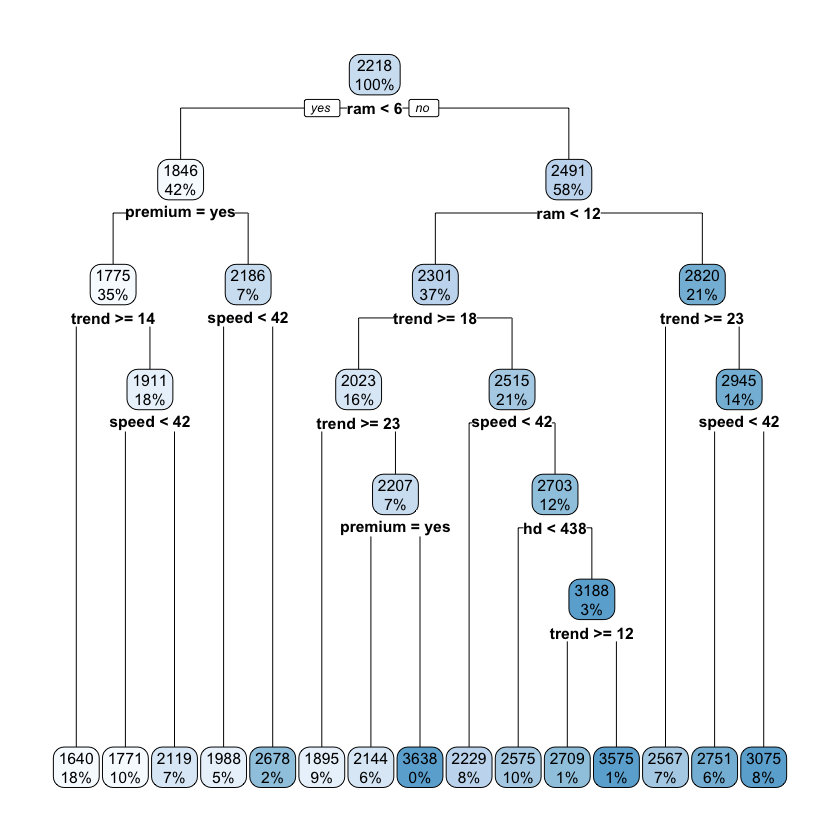

In [ ]:
# Training test set split
set.seed(123)
sample_index <- sample(1:nrow(computers), 0.7 * nrow(computers))
train <- computers[sample_index, ]
test <- computers[-sample_index, ]

# Create a decision tree regression model
m1 <- rpart(price ~ ., data = train)

# Visualize the result
rpart.plot(m1)

### Interpretation:
This graph is the decision tree result of the data.  
- **The top node:** The average of the price in the training set is 2218. When ram < 6, the result goes to the left, vice versa.  
- **On the left branch:** The average of the price with ram < 6 (42% of the data) is 1846. If premium = yes, it goes to the left, vice versa.  
- **On the right branch:** The average of the price with ram > 6 (58% of the data) is 2491. If ram < 12 (and > 6), it goes to the left, vice versa.  
- And on...
  
There are 15 leaf nodes in this tree, representing 15 predicted outcomes of the price.

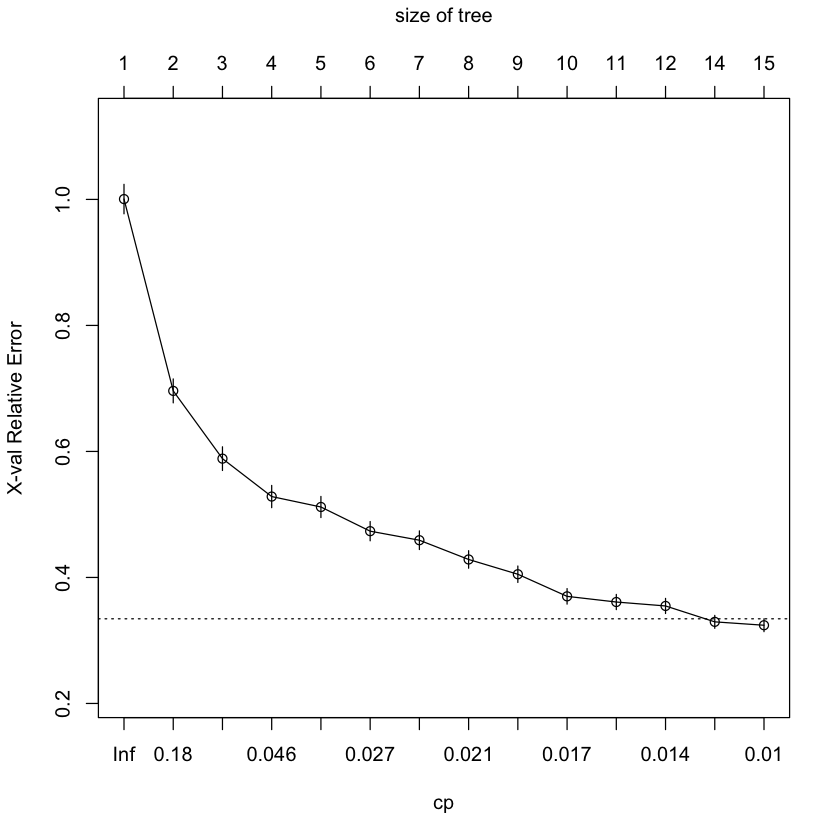

In [ ]:
# Plot complex parameter
plotcp(m1)

### Interpretation:
This graph showcases the relationship between the size of a regression tree (measured by the number of terminal nodes or leaves) and its cross-validation (X-val) relative error, at different complexity parameter (cp) values.
As the curve tending to be a straight line, the model should be optimal with a size of 15 or so, where the corresponding complexity parameter is about 0.01.

## 4. Prediction & Evaluation

In [ ]:
# Predict and evaluate training set
pred.train <- predict(m1, newdata = train)

data.frame(RMSE = RMSE(pred.train, train$price),
           R2 = R2(pred.train, train$price))

RMSE,R2
<dbl>,<dbl>
319.2807,0.6943267


In [ ]:
# Predict and evaluate test set
pred.test <- predict(m1, newdata = test)

data.frame(RMSE = RMSE(pred.test, test$price),
           R2 = R2(pred.test, test$price))

RMSE,R2
<dbl>,<dbl>
344.3411,0.6574595


### Interpretation:
The RMSEs of the model to the training and test set are similar and both very small (compared to the rage of the price in the original dataset), indicating the model is good and not overfitting.  
However, we can still try tuning the model with two ways as practise.

## 5. Pruning the tree with 1-SE rule

In [ ]:
# print cp
printcp(m1)


Regression tree:
rpart(formula = price ~ ., data = train)

Variables actually used in tree construction:
[1] hd      premium ram     speed   trend  

Root node error: 1.461e+09/4381 = 333494

n= 4381 

         CP nsplit rel error  xerror     xstd
1  0.304545      0   1.00000 1.00054 0.023380
2  0.107721      1   0.69546 0.69609 0.018966
3  0.064968      2   0.58773 0.58856 0.018766
4  0.033224      3   0.52277 0.52840 0.017629
5  0.030575      4   0.48954 0.51183 0.016738
6  0.023212      5   0.45897 0.47345 0.015265
7  0.021434      6   0.43576 0.45910 0.014786
8  0.020080      7   0.41432 0.42855 0.013877
9  0.019373      8   0.39424 0.40508 0.013008
10 0.015324      9   0.37487 0.37000 0.012299
11 0.014481     10   0.35955 0.36100 0.012045
12 0.014381     11   0.34506 0.35477 0.011967
13 0.010630     13   0.31630 0.32953 0.010234
14 0.010000     14   0.30567 0.32415 0.010202


### Interpretation:
The printed complexity parameter is the same as the cp plot.  
The smallest xerror in the table is 0.32415, with a corresponding cp as 0.01, suggesting we can prune the tree with a threshold of 0.01.  
In that way, 0.32415 * (1 + 0.01) = 0.32739, there are 12 xerrors larger than this number.  
The rpart will select the optimal tree nearby.

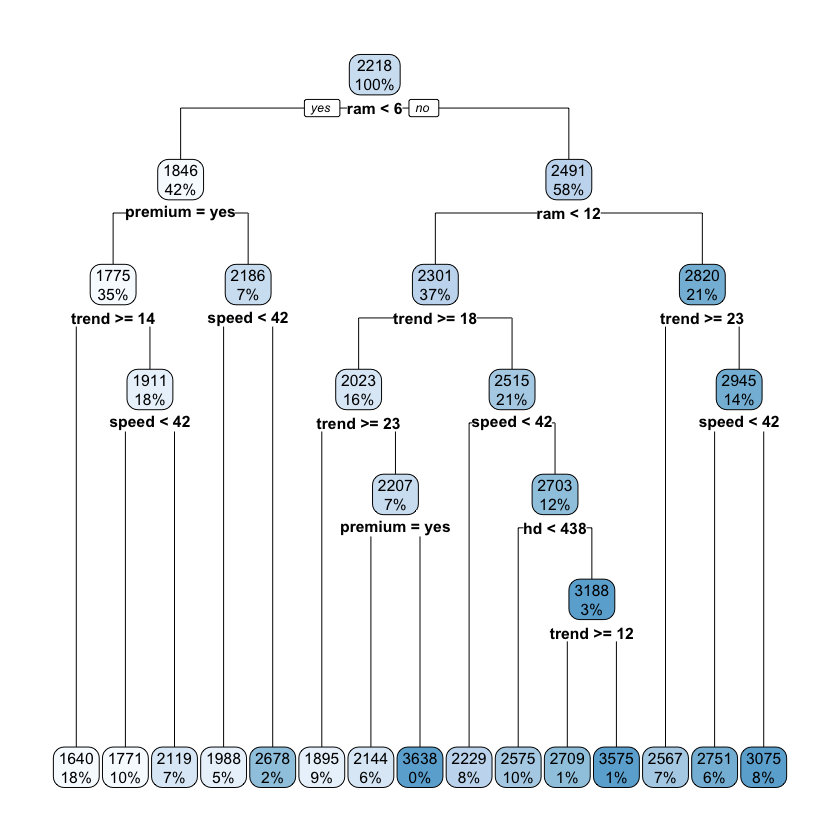

In [ ]:
# Prune the tree according to the one-SE rule
pruned_m1 <- prune(m1, cp=m1$cptable[which.min(m1$cptable[,"xerror"]),"CP"])

# Visualize the pruned tree
rpart.plot(pruned_m1)

### Interpretation:
The pruned tree is the same as the original tree. This dataset is small and the original tree is somewhat optimal enough.  
But we can also use grid search to tune the model again.

## 6. Tuning the model with Grid Search

In [ ]:
# Define grid parameter
cp_grid <- expand.grid(cp = c(seq(0.01, 0.5, by = 0.01)))

# Set up cross validation
train_control <- trainControl(method="cv", number=10, search="grid")

# Train the model with grid search
grid_search_result <- train(price ~ ., data=train, method="rpart",
trControl=train_control, tuneGrid=cp_grid)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


The warning message showed up because the dataset is too small. There is no missing value in this dataset.

In [ ]:
# Inspect the result
print(grid_search_result)

CART 

4381 samples
   9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3943, 3943, 3943, 3942, 3943, 3943, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE     
  0.01  327.8278  0.6773210  249.0141
  0.02  371.6982  0.5856227  282.2645
  0.03  404.6007  0.5092280  302.6805
  0.04  419.1663  0.4734712  311.3102
  0.05  419.1663  0.4734712  311.3102
  0.06  419.1663  0.4734712  311.3102
  0.07  442.4798  0.4130779  333.1236
  0.08  442.4798  0.4130779  333.1236
  0.09  442.4798  0.4130779  333.1236
  0.10  442.4798  0.4130779  333.1236
  0.11  472.6224  0.3293700  363.8260
  0.12  481.3407  0.3060099  372.3457
  0.13  481.3407  0.3060099  372.3457
  0.14  481.3407  0.3060099  372.3457
  0.15  481.3407  0.3060099  372.3457
  0.16  481.3407  0.3060099  372.3457
  0.17  481.3407  0.3060099  372.3457
  0.18  481.3407  0.3060099  372.3457
  0.19  481.3407  0.3060099  372.3457
  0.20  481.3407  0.3060099  372.34

### Interpretation:
The smallest RMSE value is 327.8278, which corresponds to a cp of 0.01.  
The NAs in the result might suggest an overpruned tree or insufficient data in the leaf nodes.

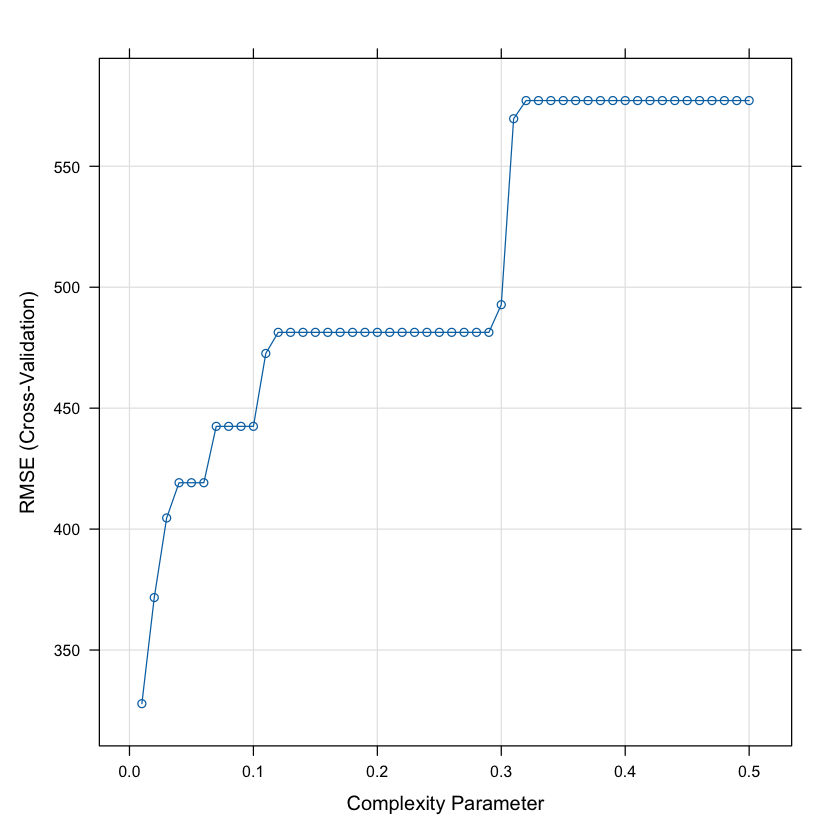

In [ ]:
# Visulize the result
plot(grid_search_result)

### Interpretation:
The RMSE is increasing drastically with increased complexity parameter.

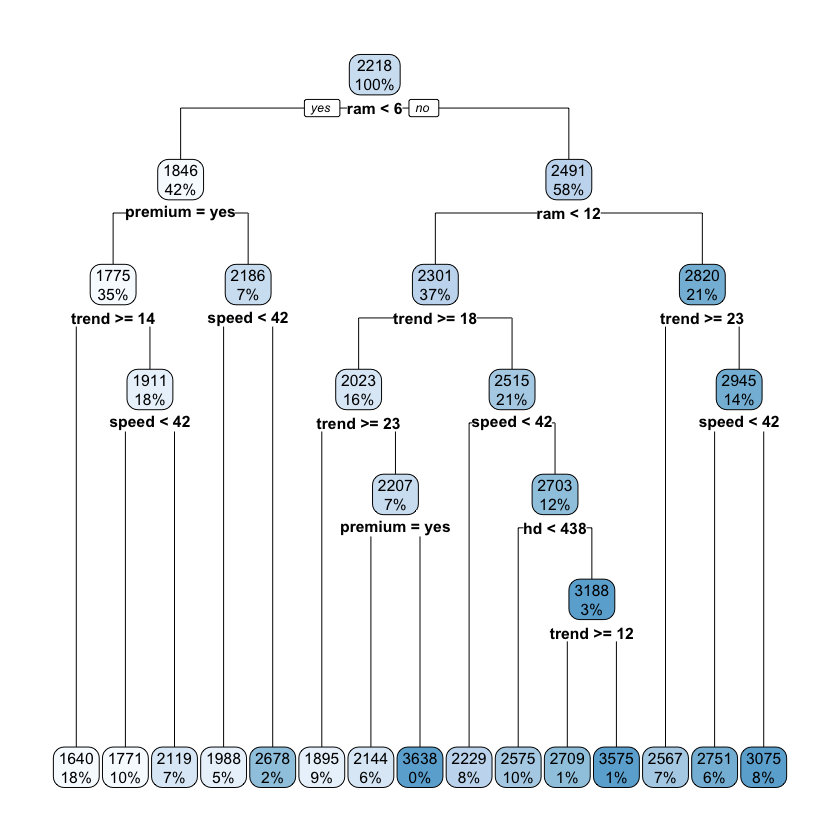

In [ ]:
# Generate the new model with grid search result
m2 <- rpart(price ~ ., data = train)

# Visualize the tree
rpart.plot(m2)

### Interpretation:
The tuned tree is also the same as the original tree, indicating the original tree is the optimal tree with the smallest RMSE.

## 7. Summary

There are multiple ways to tune the decision tree model. We can use 1-SE rule to approximately prune the tree or we can use Grid Search to find the perfect split.